# Lab 1 - Introduction to the ML pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv
np.set_printoptions(precision=3)

In [3]:
# Load the data

data = np.loadtxt('data/data_train.csv', delimiter=',')

In [4]:
# Prepare the data
X = data[:,0:-1]
y = data[:,-1]

#y[y >= 8] = 0       # Uncomment, for Task 7

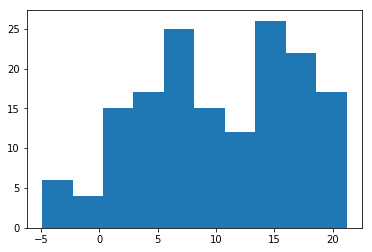

In [5]:
# Inspect the data
 
plt.figure()
plt.hist(X[:,1], 10)
plt.savefig("fig/hist1.pdf")

## Task 1

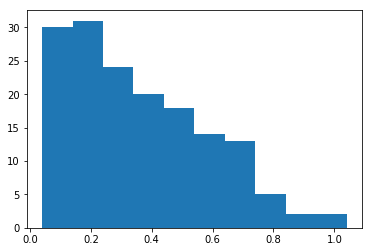

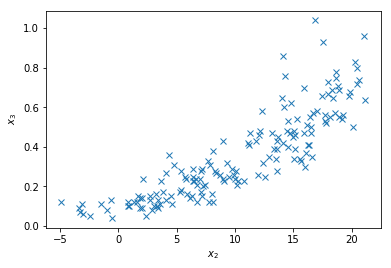

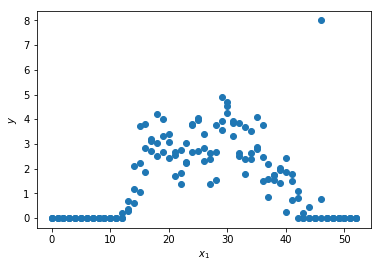

In [6]:
plt.figure()
plt.hist(X[:,2], 10)
plt.savefig("fig/hist2.pdf")

 
plt.figure()
plt.plot(X[:,1],X[:,2], 'x')
plt.xlabel('$x_2$')
plt.ylabel('$x_3$')
plt.savefig("fig/data.pdf")
 
plt.figure()
plt.plot(X[:,0],y, 'o')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.savefig("fig/data_y.pdf")

plt.show()

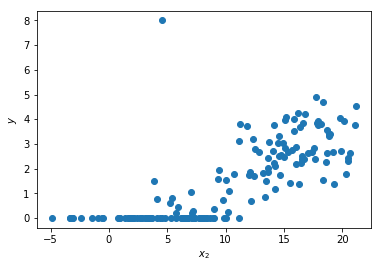

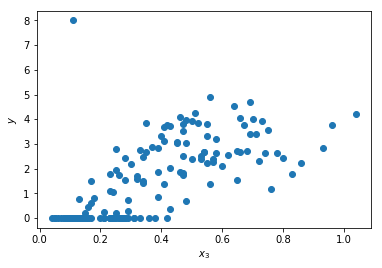

In [7]:
plt.figure()
plt.plot(X[:,1],y, 'o')
plt.xlabel('$x_2$')
plt.ylabel('$y$')


plt.figure()
plt.plot(X[:,2],y, 'o')
plt.xlabel('$x_3$')
plt.ylabel('$y$')

plt.show()

## Task 2

In [9]:
# Standardization

m = np.mean(X,axis=0)
print(m)

s = np.std(X,axis=0)
print(s)

[26.    10.23   0.358]
[15.297  6.516  0.221]


In [10]:
X = (X - m) / s

print(X)

[[-1.7   -0.605 -0.94 ]
 [-1.634 -0.181 -0.578]
 [-1.569 -0.336 -0.894]
 [-1.504 -1.794 -1.12 ]
 [-1.438 -1.044 -1.211]
 [-1.373 -0.872 -0.94 ]
 [-1.307 -0.569 -0.578]
 [-1.242 -0.546 -0.533]
 [-1.177 -0.453 -0.714]
 [-1.111 -0.327  0.099]
 [-1.046 -0.382 -0.126]
 [-0.981 -1.262 -1.211]
 [-0.915 -0.476 -0.352]
 [-0.85  -0.193  0.325]
 [-0.784  0.62   1.816]
 [-0.719  0.598  2.268]
 [-0.654  1.122  2.584]
 [-0.588  0.586  1.319]
 [-0.523  0.669  0.777]
 [-0.458  0.408 -0.036]
 [-0.392  1.576  1.997]
 [-0.327  0.338 -0.172]
 [-0.261  1.387  0.913]
 [-0.196  1.284  0.958]
 [-0.131  1.215  0.867]
 [-0.065  0.744  0.551]
 [ 0.     0.752  0.145]
 [ 0.065  0.991  0.958]
 [ 0.131  1.668  2.72 ]
 [ 0.196  1.156  0.913]
 [ 0.261  0.912  0.687]
 [ 0.327  0.979 -0.036]
 [ 0.392  1.166  0.732]
 [ 0.458  0.939  0.235]
 [ 0.523  0.87   0.506]
 [ 0.588  0.358 -0.488]
 [ 0.654  0.5   -0.081]
 [ 0.719  0.485  0.145]
 [ 0.784  0.27  -0.443]
 [ 0.85   0.815 -0.081]
 [ 0.915 -0.005 -0.669]
 [ 0.981 -0.074 

## Task 3

In [11]:
 # Feature creation
 
def phi(X, degree):
    N,D = X.shape
    for d in range(2,degree+1):
        X = np.column_stack([X,X[:,0:D]**d])
    X = np.column_stack([np.ones(len(X)), X])
    return X
 
# Polynomial degree
degree = 2
 
Z = phi(X,degree)

print(Z)

[[ 1.    -1.7   -0.605 ...  2.889  0.366  0.883]
 [ 1.    -1.634 -0.181 ...  2.671  0.033  0.334]
 [ 1.    -1.569 -0.336 ...  2.462  0.113  0.8  ]
 ...
 [ 1.     1.569 -2.05  ...  2.462  4.204  1.255]
 [ 1.     1.634 -1.094 ...  2.671  1.197  1.358]
 [ 1.     1.7   -0.327 ...  2.889  0.107  1.156]]


In [12]:
# Building a model

# beta hat
w = inv(Z.T @ Z) @ Z.T @ y

print("w = ", w)

# or :

w2 = inv((Z.T).dot(Z)).dot(Z.T).dot(y)

print("w2 = ", w2)

w =  [ 1.902  0.117  0.691  0.031 -0.676  0.24   0.031]
w2 =  [ 1.902  0.117  0.691  0.031 -0.676  0.24   0.031]


## Task 4 

In [13]:
data = np.loadtxt('data/data_test.csv', delimiter=',')
 
# Preparation and preprocessing 
 
X_test = data[:,0:-1]
X_test = (X_test - m) / s
Z_test = phi(X_test,degree)
y_test = data[:,-1]

## Task 5

In [14]:
def MSE(yt,yp):
    return np.mean((yt-yp)**2)


# Prediction
 
y_pred = Z_test @ w
 
    
# Score
 
print("MSE on test data  ", MSE(y_test,y_pred))

MSE on test data   0.5461913315483612


## Task 6 

In [15]:
print("MSE baseline      ", MSE(y_test,np.ones(len(y_test))*np.mean(y)))

MSE baseline       1.769174652901389


## Task 7

Uncomment the y[y >= 8]=0 line at the beginning, and re-run this notebook 